In [1]:
!pip install matplotlib pandas

In [2]:
import sqlite3

def init_db():
    conn = sqlite3.connect('expenses.db')  # Creates a database file
    c = conn.cursor()
    +
    c.execute('''
        CREATE TABLE IF NOT EXISTS expenses (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            date TEXT,
            category TEXT,
            description TEXT,
            amount REAL
        )
    ''')
    conn.commit()
    conn.close()

init_db()
print("Database is ready.")-

Database is ready.


In [3]:
def add_expense(date, category, description, amount):
    conn = sqlite3.connect('expenses.db')
    c = conn.cursor()
    c.execute("INSERT INTO expenses (date, category, description, amount) VALUES (?, ?, ?, ?)",
              (date, category, description, amount))
    conn.commit()
    conn.close()
    print("Expense added.")

import pandas as pd

def show_expenses():
    conn = sqlite3.connect('expenses.db')
    df = pd.read_sql_query("SELECT * FROM expenses", conn)
    conn.close()
    return df

In [4]:
add_expense('2025-05-26', 'Food', 'Lunch with friends', 12.5)
add_expense('2025-05-26', 'Transport', 'Bus ticket', 3.0)
add_expense('2025-05-26', 'Groceries', 'Vegetables and fruits', 8.0)

Expense added.
Expense added.
Expense added.


In [5]:
show_expenses()

,id,date,category,description,amount
0,1,2025-05-26,Food,Lunch with friends,12.5
1,2,2025-05-26,Transport,Bus ticket,3.0
2,3,2025-05-26,Groceries,Vegetables and fruits,8.0


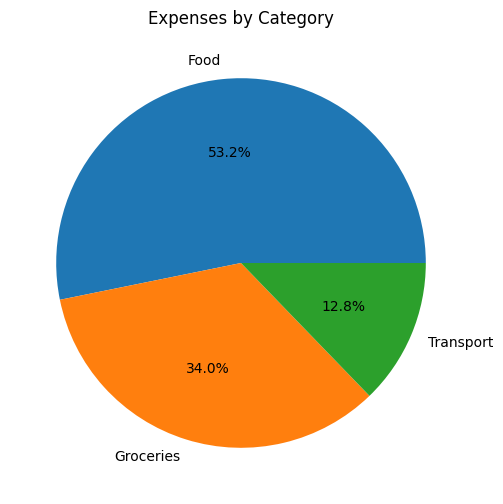

In [6]:
import matplotlib.pyplot as plt

def plot_expense_pie():
    df = show_expenses()
    if df.empty:
        print("No expenses to show.")
        return

    category_totals = df.groupby('category')['amount'].sum()

    plt.figure(figsize=(6,6))
    plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%')
    plt.title("Expenses by Category")
    plt.show()

# Run this to show the chart
plot_expense_pie()

In [11]:
from google.colab import files
files.download('expenses.db')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
show_expenses()


,id,date,category,description,amount
0,1,2025-05-26,Food,Lunch with friends,12.5
1,2,2025-05-26,Transport,Bus ticket,3.0
2,3,2025-05-26,Groceries,Vegetables and fruits,8.0


In [12]:
from google.colab import files
files.download('expenses.db')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>